In [0]:
import os
os.chdir('/content/drive/My Drive/kaggle_study/dacon_star')

## 카메라

In [0]:
import pandas as pd
camera = pd.read_feather('data/camera.feather')

In [0]:
import pandas as pd
t_camera = pd.read_feather('data/t_camera.feather')

In [4]:
t_camera.head()

,game_id,time,player,species,event,event_contents
0,38872,0.00,0,1,0,"at (22.25, 81.5078125)"
1,38872,0.00,1,1,0,"at (120.25, 153.83984375)"
2,38872,0.01,1,1,1,['Nexus [3100001]']
3,38872,0.01,1,1,2,(15E0) - TrainProbe
4,38872,0.01,1,1,6,None


In [5]:
t_camera.shape

(28714849, 6)

## camera 좌표 시각화

In [0]:
for i in range(5):
    globals()['game_cam{}'.format(i)]= camera[camera['game_id']==i]
    globals()['cam{}'.format(i)] = globals()['game_cam{}'.format(str(i))]['event_contents'].apply(lambda x: [float(i) for i in pat.sub('',x).split(',')])


In [0]:
import re
import time
t_start = time.time()
pat = re.compile('[^0-9.,]')
cam = game_cam['event_contents'].apply(lambda x: [float(i) for i in pat.sub('',x).split(',')])
# p1_xy = p1_cam['event_contents'].apply(lambda x: [float(i) for i in pat.sub('',x).split(',')])
time.time() -t_start

0.0048902034759521484

In [0]:


for i in range(5):
    x=[]
    y=[]
    for j,k in globals()['cam{}'.format(str(i))]:
        x.append(j)
        y.append(k)
    print(i)
    globals()['game_cam{}'.format(str(i))]['x'] = x
    globals()['game_cam{}'.format(str(i))]['y'] = y

[Text(0.5, 1.0, 'game_id 4, winner: [0.]')]

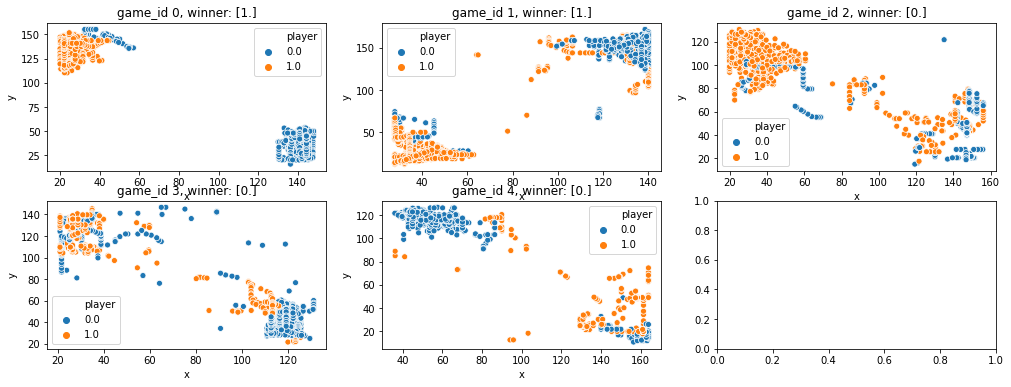

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(17,6)
sns.scatterplot(data = game_cam0,x= 'x',y='y',hue='player',ax=ax1)
sns.scatterplot(data = game_cam1,x= 'x',y='y',hue='player',ax=ax2)
sns.scatterplot(data = game_cam2,x= 'x',y='y',hue='player',ax=ax3)
sns.scatterplot(data = game_cam3,x= 'x',y='y',hue='player',ax=ax4)
sns.scatterplot(data = game_cam4,x= 'x',y='y',hue='player',ax=ax5)


ax1.set(title="game_id 0, winner: {}".format(game_cam0['winner'].unique()))
ax2.set(title="game_id 1, winner: {}".format(game_cam1['winner'].unique()))
ax3.set( title="game_id 2, winner: {}".format(game_cam2['winner'].unique()))
ax4.set( title="game_id 3, winner: {}".format(game_cam3['winner'].unique()))
ax5.set( title="game_id 4, winner: {}".format(game_cam4['winner'].unique()))

### test data

In [0]:
for i in t_camera.game_id.unique()[:6]:
    globals()['game_cam{}'.format(i)]= t_camera[t_camera['game_id']==i]
    globals()['cam{}'.format(i)] = globals()['game_cam{}'.format(str(i))]['event_contents'].apply(lambda x: [float(i) for i in pat.sub('',x).split(',')])


In [0]:


for i in t_camera.game_id.unique()[:6]:
    x=[]
    y=[]
    for j,k in globals()['cam{}'.format(str(i))]:
        x.append(j)
        y.append(k)
    print(i)
    globals()['game_cam{}'.format(str(i))]['x'] = x
    globals()['game_cam{}'.format(str(i))]['y'] = y

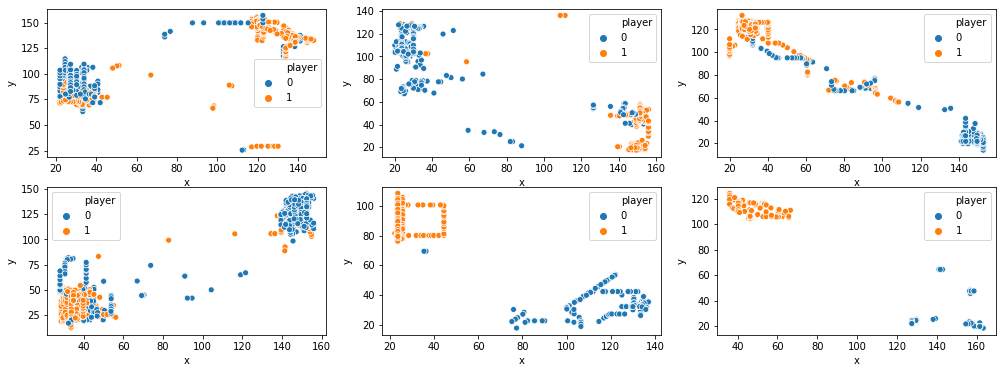

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(17,6)
sns.scatterplot(data = game_cam38872,x= 'x',y='y',hue='player',ax=ax1)
sns.scatterplot(data = game_cam38873,x= 'x',y='y',hue='player',ax=ax2)
sns.scatterplot(data = game_cam38874,x= 'x',y='y',hue='player',ax=ax3)
sns.scatterplot(data = game_cam38875,x= 'x',y='y',hue='player',ax=ax4)
sns.scatterplot(data = game_cam38876,x= 'x',y='y',hue='player',ax=ax5)
sns.scatterplot(data = game_cam38877,x= 'x',y='y',hue='player',ax=ax6)


## starting point 찾기

In [0]:
print(camera.shape)
camera.head()

(31629407, 11)


,Unnamed: 0,game_id,winner,time,player,species,event,event_contents,player0_starting,player1_starting,map
0,0,0.0,1.0,0,0.0,0.0,0.0,"at (145.25, 21.5078125)",2,1,0.0
1,1,0.0,1.0,0,1.0,0.0,0.0,"at (22.75, 147.0078125)",2,1,0.0
2,4,0.0,1.0,0,0.0,0.0,0.0,"at (142.99609375, 24.50390625)",2,1,0.0
3,5,0.0,1.0,0,0.0,0.0,0.0,"at (142.5078125, 24.98828125)",2,1,0.0
4,6,0.0,1.0,0,0.0,0.0,0.0,"at (139.6171875, 27.8828125)",2,1,0.0


In [0]:
# import threading
# import concurrent.futures
# import time
# t_start = time.time()

# p0_st = []
# p1_st = []
# def starting_point(data,i):
#     p0_stp= list(data.loc[(data['game_id']==i) & (data['player']==0),'event_contents'][:1])
#     p1_stp =list( data.loc[(data['game_id']==i) & (data['player']==1),'event_contents'][:1])

#     return p0_stp,p1_stp


# with concurrent.futures.ThreadPoolExecutor() as executor:
#     t= [executor.submit(starting_point,camera,i) for i in camera['game_id'].unique()]

# for i in t:
#     a,b = i.result()
#     p0_st.append(a)
#     p1_st.append(b)

# time.time() - t_start

In [30]:
len(t_camera.game_id.unique())

16787

In [0]:
p0_starting = t_camera[t_camera.player==0]
p1_starting = t_camera[t_camera.player==1]
p0_starting = p0_starting.loc[(p0_starting.game_id.shift(1) != p0_starting.game_id)]
p1_starting= p1_starting.loc[(p1_starting.game_id.shift(1) != p1_starting.game_id)]

In [29]:
len(p1_starting.game_id.unique())

16783

In [48]:
t_camera[t_camera.game_id.shift(1) != t_camera.game_id]

,game_id,time,player,species,event,event_contents
0,38872,0.0,0,1,0,"at (22.25, 81.5078125)"
699,38873,0.0,0,2,0,"at (24.75, 128.0078125)"
1045,38874,0.0,0,0,0,"at (151.25, 20.5078125)"
1510,38875,0.0,1,1,0,"at (31.75, 22.5078125)"
2382,38876,0.0,0,2,0,"at (135.25, 31.5078125)"
...,...,...,...,...,...,...
13554791,55654,0.0,0,2,0,"at (22.25, 81.5078125)"
13555367,55655,0.0,0,2,0,"at (120.25, 153.83984375)"
13556815,55656,0.0,1,1,0,"at (151.25, 20.5078125)"
13557473,55657,0.0,0,0,0,"at (31.75, 22.5078125)"


In [0]:
p0_starting = p0_starting[['game_id','event_contents']].rename({'event_contents':'P0_ec'},axis=1)
p1_starting = p1_starting[['game_id','event_contents']].rename({'event_contents':'P1_ec'},axis=1)


In [0]:
df_starting = pd.DataFrame(t_camera.game_id.unique(),columns=['game_id'])
df_starting.index = df_starting.game_id 
df_starting.drop('game_id',axis=1,inplace=True)
df_starting

In [0]:
df_starting = pd.merge(df_starting,p0_starting,on='game_id',how='left')
df_starting = pd.merge(df_starting,p1_starting,on='game_id',how='left')

In [36]:
df_starting.P0_ec =df_starting.P0_ec.fillna(0)
df_starting.P1_ec =df_starting.P1_ec.fillna(0)
df_starting[df_starting.P1_ec.isnull()],df_starting[df_starting.P0_ec.isnull()]

(Empty DataFrame
 Columns: [game_id, P0_ec, P1_ec]
 Index: [], Empty DataFrame
 Columns: [game_id, P0_ec, P1_ec]
 Index: [])

In [37]:
df_starting

,game_id,P0_ec,P1_ec
0,38872,"at (22.25, 81.5078125)","at (120.25, 153.83984375)"
1,38873,"at (24.75, 128.0078125)","at (151.25, 20.5078125)"
2,38874,"at (151.25, 20.5078125)","at (24.75, 128.0078125)"
3,38875,"at (152.25, 142.0078125)","at (31.75, 22.5078125)"
4,38876,"at (135.25, 31.5078125)","at (22.25, 81.5078125)"
...,...,...,...
16782,55654,"at (22.25, 81.5078125)","at (135.25, 31.5078125)"
16783,55655,"at (120.25, 153.83984375)","at (135.25, 31.5078125)"
16784,55656,"at (24.75, 128.0078125)","at (151.25, 20.5078125)"
16785,55657,"at (31.75, 22.5078125)","at (152.25, 142.0078125)"


In [0]:
import re

pat = re.compile('[^0-9,.]')
a= df_starting.P0_ec.apply(lambda x : pat.sub('',str(x)).split(','))
b= df_starting.P1_ec.apply(lambda x : pat.sub('',str(x)).split(','))

In [0]:
p0_x= a.str[0].astype(float)
p0_y = a.str[1].astype(float)
p1_x = b.str[0].astype(float)
p1_y = b.str[1].astype(float)

In [0]:
df_starting['P0_x'] = p0_x
df_starting['P0_y'] = p0_y
df_starting['P1_x'] = p1_x
df_starting['P1_y'] = p1_y


In [0]:
df_starting.drop(['P0_ec','P1_ec'],axis=1,inplace=True)

In [43]:
df_starting

,game_id,P0_x,P0_y,P1_x,P1_y
0,38872,22.25,81.507812,120.25,153.839844
1,38873,24.75,128.007812,151.25,20.507812
2,38874,151.25,20.507812,24.75,128.007812
3,38875,152.25,142.007812,31.75,22.507812
4,38876,135.25,31.507812,22.25,81.507812
...,...,...,...,...,...
16782,55654,22.25,81.507812,135.25,31.507812
16783,55655,120.25,153.839844,135.25,31.507812
16784,55656,24.75,128.007812,151.25,20.507812
16785,55657,31.75,22.507812,152.25,142.007812


In [49]:
df_starting[df_starting.P1_y.isnull()]

,game_id,P0_x,P0_y,P1_x,P1_y
1486,40358,145.25,21.507812,0.0,NaN
12285,51157,36.75,122.007812,0.0,NaN
13445,52317,36.75,122.007812,0.0,NaN
15707,54579,127.25,27.507812,0.0,NaN


In [0]:
 df_starting.P0_y = df_starting.P0_y.fillna(0)
 df_starting.P1_y =df_starting.P1_y.fillna(0)

In [0]:
from sklearn.cluster import KMeans
kmeans_clst = KMeans(n_clusters=15,random_state=2020).fit(df_starting[['P0_x','P0_y']])


In [0]:
kmeans_clst2 = KMeans(n_clusters=15,random_state=2020).fit(df_starting[['P1_x','P0_y']])

In [0]:
df_starting['P0_starting']= kmeans_clst.labels_+1

In [0]:
df_starting['P1_starting'] = kmeans_clst2.labels_+1

In [55]:
df_starting

,game_id,P0_x,P0_y,P1_x,P1_y,P0_starting,P1_starting
0,38872,22.25,81.507812,120.25,153.839844,5,6
1,38873,24.75,128.007812,151.25,20.507812,1,11
2,38874,151.25,20.507812,24.75,128.007812,2,13
3,38875,152.25,142.007812,31.75,22.507812,6,9
4,38876,135.25,31.507812,22.25,81.507812,14,2
...,...,...,...,...,...,...,...
16782,55654,22.25,81.507812,135.25,31.507812,5,14
16783,55655,120.25,153.839844,135.25,31.507812,8,15
16784,55656,24.75,128.007812,151.25,20.507812,1,11
16785,55657,31.75,22.507812,152.25,142.007812,4,4


In [0]:
df_starting.to_csv('data/t_starting.csv',index=False)

## starting point 별 종족 승률

- 스타팅 포인트 가져와서 소수점 이하 자르고 스타팅 포인트를 최대한 범주형으로 만들어보자

In [0]:
x_train =pd.read_csv('data/xy_train.csv')
print(x_train.shape)
x_train.head()

(38872, 35)


,game_id,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,winner,p0_wm,p1_wm,P1_p_selection,P0_p_selection,player0_starting,player1_starting,map
0,0,0.0,444.0,50.0,34.0,35.0,3.0,24.0,2.0,0.0,0.0,425.0,57.0,34.0,28.0,1.0,3.0,0.0,0.0,19.0,-7.0,0.0,7.0,2.0,21.0,2.0,0.0,1.0,9,6,53,45,2,1,0.0
1,1,1.0,627.0,186.0,77.0,160.0,10.0,162.0,1.0,0.0,0.0,858.0,116.0,67.0,131.0,8.0,31.0,0.0,0.0,-231.0,70.0,10.0,29.0,2.0,131.0,1.0,0.0,1.0,22,17,114,177,4,15,2.0
2,2,1.0,413.0,90.0,69.0,160.0,14.0,99.0,6.0,0.0,2.0,725.0,232.0,85.0,204.0,9.0,109.0,5.0,2.0,-312.0,-142.0,-16.0,-44.0,5.0,-10.0,1.0,-2.0,0.0,19,23,206,86,14,10,6.0
3,3,0.0,713.0,180.0,82.0,276.0,6.0,132.0,0.0,0.0,1.0,388.0,148.0,89.0,268.0,19.0,710.0,0.0,0.0,325.0,32.0,-7.0,8.0,-13.0,-578.0,0.0,0.0,0.0,7,24,144,171,8,12,5.0
4,4,0.0,430.0,67.0,57.0,177.0,10.0,224.0,1.0,0.0,2.0,272.0,126.0,36.0,106.0,8.0,99.0,4.0,0.0,158.0,-59.0,21.0,71.0,2.0,125.0,-3.0,0.0,0.0,14,13,118,64,5,9,3.0


In [0]:
map_p0 = x_train[(x_train.map==3)]

In [0]:
map_p0.winner.groupby(map_p0.player1_starting).value_counts()

player1_starting  winner
5                 0.0       1323
                  1.0       1287
8                 1.0          1
9                 1.0       1418
                  0.0       1294
13                0.0          1
Name: winner, dtype: int64

In [0]:
map 0 starting_point :1,2
map 1 starting_point : 3,6
map 2 starting_point : 4,15
map 3 starting_point : 5,9

In [0]:
x_train.P0_species

In [0]:
map0 = x_train[(x_train.map==0)]

In [0]:
st0= x_train[x_train.P0_species==2]

In [0]:
terran = []
zerg = []
protoss = []
for i in range(7):
    t= (len(x_train[(x_train.P0_species==0)&(x_train.map==i)&(x_train.winner==0)]) + len(x_train[(x_train.P1_species==0)&(x_train.map==i)&(x_train.winner==1)]))
    p = (len(x_train[(x_train.P0_species==1)&(x_train.map==i)&(x_train.winner==0)]) + len(x_train[(x_train.P1_species==1)&(x_train.map==i)&(x_train.winner==1)]))
    z= (len(x_train[(x_train.P0_species==2)&(x_train.map==i)&(x_train.winner==0)]) + len(x_train[(x_train.P1_species==2)&(x_train.map==i)&(x_train.winner==1)]))
    terran.append(t)
    protoss.append(p)
    zerg.append(z)

In [0]:
terran

[2436, 2144, 2064, 2147, 1594, 2221, 2483]

In [0]:
import numpy as np
map_sp = pd.DataFrame(index = np.arange(7))
# map_sp['map'] = x_train.map

In [0]:
map_sp['t_count']= terran
map_sp['p_count']= protoss
map_sp['z_count'] = zerg

In [0]:
map_sp

,t_count,p_count,z_count
0,2436,1890,2253
1,2144,1619,1955
2,2064,1517,1598
3,2147,1474,1703
4,1594,1000,1297
5,2221,1522,1833
6,2483,1813,2309


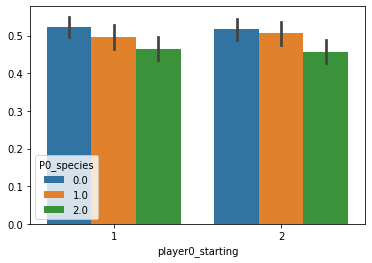

In [0]:
import seaborn as sns

sns.barplot(x= map0.player0_starting,y = map0.winner,hue=map0.P0_species)